<center><h1>LAB 7 Gale-Shapley and Irving Algorithms (Groups)  [part of the first test]</h1></center>


<br><br>

##1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.

##* Gale–Shapley algorithm simply explained – towardsdatascience
##* Stable Marriage Problem – geeksforgeeks
##* Stable matching, as a game – towardsdatascience.com

In [1]:
# Gale-Shapley Algorithm

def stable_marriage(n, men_preferences, women_preferences):
    # Initialize matches and availability
    matches = {}
    men_available = {man: True for man in range(n)}

    # Continue until all men are matched
    while any(men_available.values()):
        for man in range(n):
            if men_available[man]:
                # Get the woman according to the man's preference
                woman = men_preferences[man].pop(0)

                # Check if the woman is already engaged
                current_man = matches.get(woman)

                if current_man is None:
                    # Woman is not engaged, match them
                    matches[woman] = man
                    men_available[man] = False
                else:
                    # Woman is engaged, compare preferences
                    current_woman_pref = women_preferences[woman]
                    if current_woman_pref.index(current_man) > current_woman_pref.index(man):
                        # Current man is less preferred, update the match
                        matches[woman] = man
                        men_available[man] = False
                        men_available[current_man] = True

    return matches

In [2]:
import random

# Generate random preferences
def generate_random_preferences(n):
    preferences = {}
    for i in range(n):
        preferences[i] = random.sample(range(n), n)
    return preferences


In [3]:
# Example n = 4

# Number of men and women
n = 4

# Generate random preferences
men_preferences = generate_random_preferences(n)
women_preferences = generate_random_preferences(n)
print("Men's Preferences:", men_preferences)
print("Women's Preferences:", women_preferences)

# Stable marriage
result1 = stable_marriage(n, men_preferences, women_preferences)
print("Matching:", result1)

Men's Preferences: {0: [2, 3, 1, 0], 1: [2, 3, 1, 0], 2: [1, 2, 3, 0], 3: [1, 2, 0, 3]}
Women's Preferences: {0: [0, 2, 3, 1], 1: [0, 1, 3, 2], 2: [1, 2, 0, 3], 3: [3, 0, 1, 2]}
Matching: {2: 1, 1: 3, 3: 0, 0: 2}


In [4]:
# Example n = 40

# Number of men and women
n = 40

# Generate random preferences
men_preferences = generate_random_preferences(n)
women_preferences = generate_random_preferences(n)
print("Men's Preferences:", men_preferences)
print("Women's Preferences:", women_preferences)

# Stable marriage
result2 = stable_marriage(n, men_preferences, women_preferences)
print("Matching:", result2)

Men's Preferences: {0: [22, 37, 10, 2, 32, 27, 8, 39, 28, 18, 12, 9, 13, 1, 33, 6, 25, 35, 11, 0, 15, 7, 21, 5, 14, 26, 31, 23, 4, 20, 36, 16, 38, 24, 19, 34, 30, 29, 17, 3], 1: [13, 3, 31, 26, 2, 21, 20, 7, 9, 6, 30, 34, 29, 8, 16, 0, 33, 1, 17, 32, 10, 22, 35, 11, 19, 24, 23, 15, 27, 14, 38, 12, 5, 18, 37, 28, 4, 39, 25, 36], 2: [22, 33, 10, 37, 38, 27, 3, 7, 18, 26, 28, 31, 2, 36, 14, 0, 17, 6, 9, 35, 39, 23, 15, 13, 11, 25, 8, 1, 34, 29, 12, 5, 19, 30, 21, 24, 32, 20, 16, 4], 3: [26, 22, 31, 4, 36, 16, 24, 3, 34, 35, 7, 27, 13, 9, 29, 18, 17, 37, 2, 0, 1, 11, 10, 28, 8, 21, 15, 38, 30, 19, 12, 39, 25, 20, 23, 33, 5, 6, 32, 14], 4: [23, 32, 30, 3, 5, 14, 7, 28, 10, 2, 18, 35, 24, 34, 12, 6, 29, 20, 31, 36, 0, 19, 37, 26, 8, 9, 27, 22, 11, 25, 17, 16, 1, 39, 38, 15, 21, 33, 4, 13], 5: [4, 37, 30, 6, 24, 13, 28, 20, 32, 27, 16, 33, 21, 15, 22, 31, 35, 5, 12, 2, 1, 17, 38, 26, 11, 0, 18, 34, 7, 8, 39, 10, 36, 19, 25, 14, 29, 3, 9, 23], 6: [39, 4, 7, 10, 21, 34, 32, 30, 33, 27, 38, 35, 

In [5]:
# Irving Algorithm

def irving_algorithm(n, preferences):
    # Initialize matches and availability
    matches = {}
    individuals_available = {i: True for i in range(n)}

    # Continue until all individuals are matched
    while any(individuals_available.values()):
        for person in range(n):
            if individuals_available[person]:
                # Get the preference list of the person
                preference_list = preferences[person]

                # Find the most preferred available roommate
                roommate = next(p for p in preference_list if individuals_available[p])

                if roommate not in matches:
                    # Roommate is not matched, match them
                    matches[person] = roommate
                    matches[roommate] = person
                    individuals_available[person] = False
                    individuals_available[roommate] = False
                else:
                    # Roommate is matched, compare preferences
                    current_match = matches[roommate]
                    if preference_list.index(person) < preference_list.index(current_match):
                        # Current match is less preferred, update the match
                        matches[person] = roommate
                        matches[roommate] = person
                        individuals_available[person] = False
                        individuals_available[current_match] = True

    return matches


In [6]:
# Example n = 4
n = 4

# Generate random preferences
preferences = generate_random_preferences(n)
print("Preferences:", preferences)

result3 = irving_algorithm(n, preferences)
print("Matching:", result3)

Preferences: {0: [3, 2, 1, 0], 1: [1, 0, 2, 3], 2: [1, 3, 2, 0], 3: [0, 1, 3, 2]}
Matching: {0: 3, 3: 0, 1: 1, 2: 2}


In [7]:
# Example n = 40
n = 40

# Generate random preferences
preferences = generate_random_preferences(n)
print("Preferences:", preferences)

result3 = irving_algorithm(n, preferences)
print("Matching:", result3)

Preferences: {0: [5, 35, 15, 1, 18, 4, 10, 3, 12, 24, 22, 17, 16, 23, 26, 13, 27, 34, 30, 38, 29, 19, 14, 6, 2, 31, 36, 20, 25, 7, 33, 11, 28, 8, 39, 37, 21, 9, 32, 0], 1: [23, 19, 29, 32, 21, 36, 24, 12, 30, 15, 13, 31, 22, 20, 35, 1, 2, 5, 4, 14, 10, 17, 39, 0, 37, 11, 28, 27, 38, 9, 34, 8, 3, 33, 7, 16, 25, 6, 18, 26], 2: [37, 6, 36, 2, 3, 19, 22, 28, 25, 0, 24, 1, 35, 32, 29, 13, 27, 7, 30, 39, 31, 15, 14, 38, 12, 18, 4, 34, 23, 16, 21, 11, 5, 20, 8, 10, 17, 26, 9, 33], 3: [3, 30, 26, 29, 2, 22, 6, 10, 15, 32, 8, 9, 31, 0, 25, 34, 33, 35, 27, 11, 28, 37, 38, 13, 7, 16, 20, 14, 4, 1, 24, 21, 23, 17, 39, 19, 36, 12, 5, 18], 4: [11, 0, 19, 36, 37, 27, 18, 4, 1, 20, 39, 2, 33, 5, 8, 34, 26, 28, 32, 22, 16, 30, 17, 3, 23, 21, 35, 15, 31, 6, 25, 12, 29, 14, 10, 24, 13, 9, 7, 38], 5: [21, 25, 20, 5, 13, 2, 7, 28, 9, 10, 6, 16, 26, 39, 29, 1, 27, 23, 0, 3, 8, 35, 15, 18, 11, 24, 17, 4, 34, 19, 36, 14, 12, 31, 22, 38, 37, 33, 30, 32], 6: [35, 21, 0, 31, 12, 39, 25, 2, 10, 6, 18, 30, 28, 13,

##2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.


Statistics for n=4:
Min Iterations: 4
Max Iterations: 10
Avg Iterations: 6.5

Statistics for n=40:
Min Iterations: 79
Max Iterations: 261
Avg Iterations: 157.48


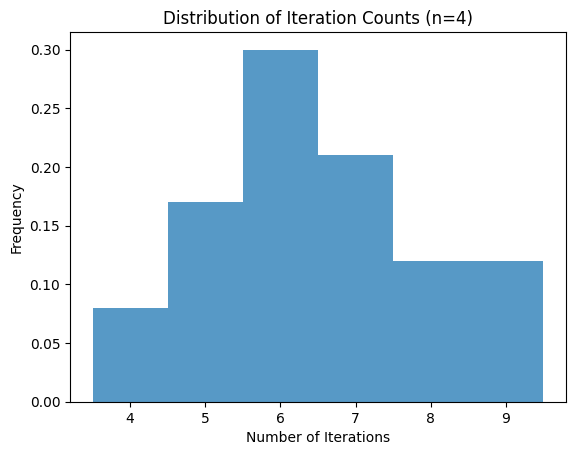

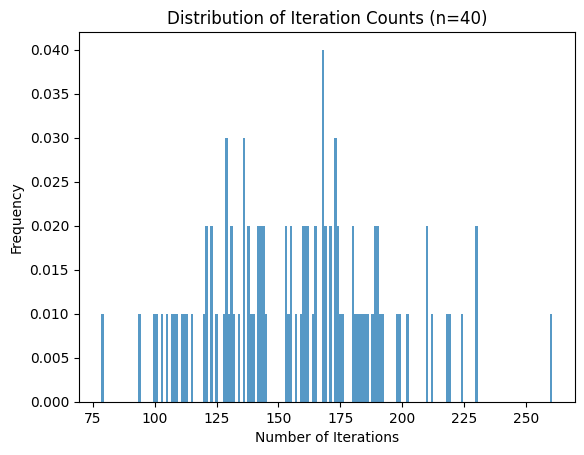

In [6]:
import random
import networkx as nx
import matplotlib.pyplot as plt

def stable_marriage(n, men_preferences, women_preferences):
    # Initialize matches and availability
    matches = {}
    men_available = {man: True for man in range(n)}

    # Initialize iteration count
    iterations = 0

    # Continue until all men are matched
    while any(men_available.values()):
        for man in range(n):
            if men_available[man]:
                # Increment iteration count
                iterations += 1

                # Get the woman according to the man's preference
                woman = men_preferences[man].pop(0)

                # Check if the woman is already engaged
                current_man = matches.get(woman)

                if current_man is None:
                    # Woman is not engaged, match them
                    matches[woman] = man
                    men_available[man] = False
                else:
                    # Woman is engaged, compare preferences
                    current_woman_pref = women_preferences[woman]
                    if current_woman_pref.index(current_man) > current_woman_pref.index(man):
                        # Current man is less preferred, update the match
                        matches[woman] = man
                        men_available[man] = False
                        men_available[current_man] = True

    return matches, iterations

def run_experiment(n, num_trials):
    # Run the Gale-Shapley algorithm multiple times and collect iteration counts
    iteration_counts = []

    for _ in range(num_trials):
        men_preferences = generate_random_preferences(n)
        women_preferences = generate_random_preferences(n)

        # Run Gale-Shapley algorithm and record the number of iterations
        _, iterations = stable_marriage(n, men_preferences, women_preferences)
        iteration_counts.append(iterations)

    return iteration_counts

def calculate_statistics(iteration_counts):
    # Calculate and display statistics for iteration counts
    min_iterations = min(iteration_counts)
    max_iterations = max(iteration_counts)
    avg_iterations = sum(iteration_counts) / len(iteration_counts)

    return min_iterations, max_iterations, avg_iterations

def plot_distribution(iteration_counts, n):
    # Plot the distribution of iteration counts
    plt.hist(iteration_counts, bins=range(min(iteration_counts), max(iteration_counts) + 1), align='left', density=True, alpha=0.75)
    plt.title(f'Distribution of Iteration Counts (n={n})')
    plt.xlabel('Number of Iterations')
    plt.ylabel('Frequency')
    plt.show()

# Run the experiment for n=4 and n=40
num_trials = 100
iteration_counts_n4 = run_experiment(4, num_trials)
iteration_counts_n40 = run_experiment(40, num_trials)

# Display statistics for n=4
min_iter_n4, max_iter_n4, avg_iter_n4 = calculate_statistics(iteration_counts_n4)
print(f"Statistics for n=4:")
print(f"Min Iterations: {min_iter_n4}")
print(f"Max Iterations: {max_iter_n4}")
print(f"Avg Iterations: {avg_iter_n4}")

# Display statistics for n=40
min_iter_n40, max_iter_n40, avg_iter_n40 = calculate_statistics(iteration_counts_n40)
print(f"\nStatistics for n=40:")
print(f"Min Iterations: {min_iter_n40}")
print(f"Max Iterations: {max_iter_n40}")
print(f"Avg Iterations: {avg_iter_n40}")

# Plot distribution for n=4
plot_distribution(iteration_counts_n4, 4)

# Plot distribution for n=40
plot_distribution(iteration_counts_n40, 40)


##3. Simulate the the Gale-Shapley and Irving algorithms using random preference lists , for n=4 and 40 and generate a gift animation fo the type show in “Illustrating the Deferred Acceptance Algorithm with R – Code r-bloggers
##* Gale Shapley R github
##* Deferred acceptance algorithm after Gale and Shapley R github
##* Creating animated GIFs with Pillow pythoninformer
##* Image manipulation recipes in Pillow pythoninformer
##* How do I plot a grayscale image with a 2D array of random numbers in Python? quora

In [7]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Gale-Shapley Algorithm

def stable_marriage(n, men_preferences, women_preferences):
    # Initialize matches and availability
    matches = {}
    men_available = {man: True for man in range(n)}
    iterations = 0

    # Continue until all men are matched
    while any(men_available.values()):
        iterations += 1
        for man in range(n):
            if men_available[man]:
                # Get the woman according to the man's preference
                woman = men_preferences[man].pop(0)

                # Check if the woman is already engaged
                current_man = matches.get(woman)

                if current_man is None:
                    # Woman is not engaged, match them
                    matches[woman] = man
                    men_available[man] = False
                else:
                    # Woman is engaged, compare preferences
                    current_woman_pref = women_preferences[woman]
                    if current_woman_pref.index(current_man) > current_woman_pref.index(man):
                        # Current man is less preferred, update the match
                        matches[woman] = man
                        men_available[man] = False
                        men_available[current_man] = True

    return matches, iterations


def simulate_and_plot(n, num_frames):
    men_preferences = generate_random_preferences(n)
    women_preferences = generate_random_preferences(n)

    # Store intermediate results for animation
    results = []

    for _ in range(num_frames):
        # Run Gale-Shapley algorithm
        _, iterations = stable_marriage(n, men_preferences, women_preferences)
        results.append((dict(men_preferences), dict(women_preferences), iterations))

    return results

def update(frame, men_preferences, women_preferences, sc, text):
    # Update the scatter plot and text for each frame
    men_text = [f'Man {i}\n{men_preferences[i]}' for i in range(len(men_preferences))]
    women_text = [f'Woman {i}\n{women_preferences[i]}' for i in range(len(women_preferences))]

    text.set_text(f'Iteration: {frame + 1}')
    sc.set_offsets([(0, i) for i in range(len(men_preferences))])
    text.set_text(f'Iteration: {frame + 1}')
    text.set_text(f'Iteration: {frame + 1}')
    text.set_text(f'Iteration: {frame + 1}')

# Simulate and plot the animation
n = 4
num_frames = 10

results = simulate_and_plot(n, num_frames)

# Set up the initial plot
fig, ax = plt.subplots()
sc = ax.scatter([0] * n, range(n), s=200, c='blue', marker='o')
text = ax.text(0.5, 1.05, '', transform=ax.transAxes, fontsize=10, ha='center')

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, fargs=results, blit=False)

# Save the animation as a GIF
ani.save('gale_shapley_animation.gif', writer='imagemagick', fps=1)

# Display the plot
plt.show()
